# Obesity Data Analysis

This is an analysis on Obesity and other health factors of individuals from Mexico, Peru and Columbia. The variables included in this data set are:
- Gender
- Age
- Height
- Weight
- Family History with over weight
- Do you eat high caloric food
- Do you eat vegetables in your meals
- How many meals do you have a day
- Do you eat any food inbetween meals

- Do you smoke
- How much water do you drink daily?
- Do you monitor the calories you eat daily?
- How often do you have physical activity?
- How much time do you use technological devices such as cell phone, videogames, television, computer and others?
- How often do you drink alcohol?
- Which transportation do you usually use?

In this analysis we will be comparing different data points and discussing their impact on the person's Obesity Level.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [81]:
data = pd.read_csv('ob.csv')

data['cat'] = pd.factorize(data['NObeyesdad'])[0]

print(data.head(10))

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   
5    Male  29.0    1.62    53.0                             no  yes   2.0   
6  Female  23.0    1.50    55.0                            yes  yes   3.0   
7    Male  22.0    1.64    53.0                             no   no   2.0   
8    Male  24.0    1.78    64.0                            yes  yes   3.0   
9    Male  22.0    1.72    68.0                            yes  yes   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  y

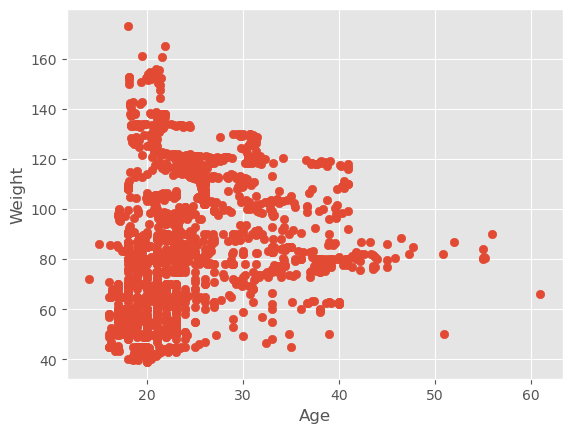

In [82]:
x = 'Age'
style.use("ggplot")
plt.scatter(data[x], data["Weight"])
plt.xlabel(x)
plt.ylabel("Weight")
plt.show()

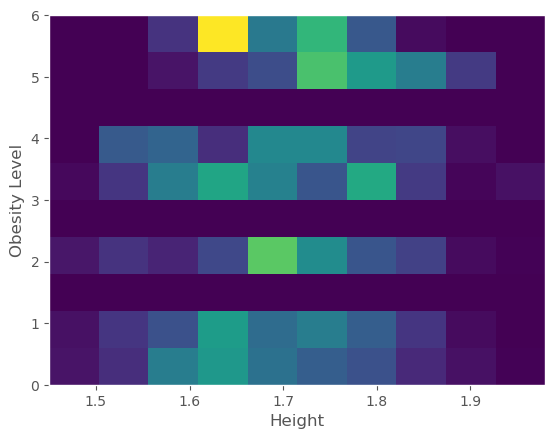

In [83]:
x = 'Height'
style.use("ggplot")
plt.hist2d(data[x], data["cat"], bins=10)
plt.xlabel(x)
plt.ylabel("Obesity Level")
plt.show()

In this heat map the colour defines how density of samples within that area. So this shows that the heights within 1.6 and 1.7 contain the most samples with the highest Obesity Level.

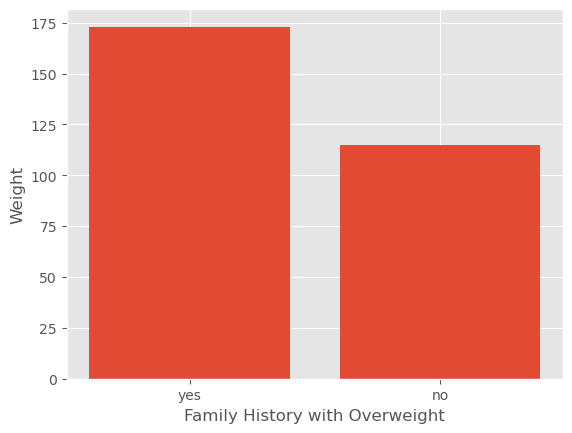

In [84]:
x = 'family_history_with_overweight'
style.use("ggplot")
plt.bar(data[x], data["Weight"])
plt.xlabel('Family History with Overweight')
plt.ylabel("Weight")
plt.show()

In [1]:
x = 'MTRANS'
style.use("ggplot")
plt.bar(data[x], data["Weight"])
plt.xlabel('Method of Transportation')
plt.ylabel("Weight")
plt.show()

NameError: name 'style' is not defined

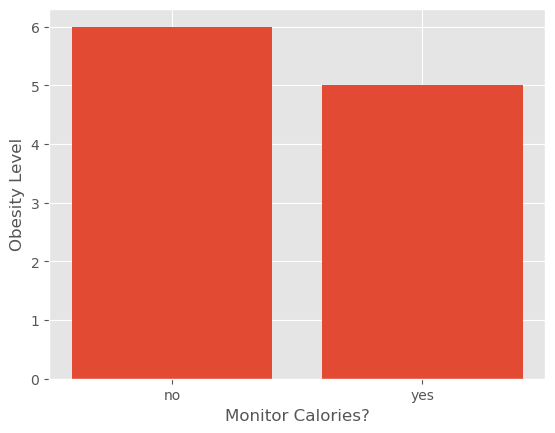

In [86]:
x = 'SCC'
style.use("ggplot")
plt.bar(data[x], data["cat"])
plt.xlabel('Monitor Calories?')
plt.ylabel("Obesity Level")
plt.show()

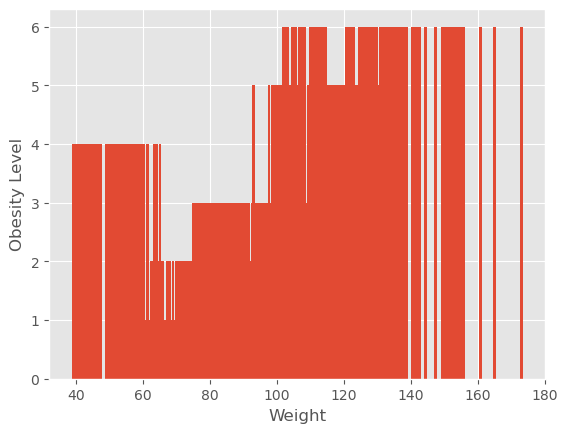

In [87]:
x = 'Weight'
style.use("ggplot")
plt.bar(data[x], data["cat"])
plt.xlabel('Weight')
plt.ylabel("Obesity Level")
plt.show()

In [88]:
countCat = data['cat'].value_counts()
print(countCat)

cat
3    351
6    324
5    297
1    290
2    290
0    287
4    272
Name: count, dtype: int64


In [104]:
counted = []
for i in countCat:
    counted.append(i)

print('Values from value_counts in a list:\n', counted)
total = np.sum(counted)

print('Total data points:\n', total)

ob0 = counted[5]/total*100
ob1 = counted[3]/total*100
ob2 = counted[4]/total*100
ob3 = counted[0]/total*100
ob4 = counted[6]/total*100
ob5 = counted[2]/total*100
ob6 = counted[1]/total*100

percentage = [ob0, ob1, ob2, ob3, ob4, ob5, ob6]
print('List of Percentages: \n', percentage)
ob_level = ['Obesity Level 2', 'Obesity Level 2', 'Obesity Level 3', 'Obesity Level 4', 'Obesity Level 5', 'Obesity Level 6']
    

Values from value_counts in a list:
 [351, 324, 297, 290, 290, 287, 272]
Total data points:
 2111
List of Percentages: 
 [13.59545239223117, 13.737565135007104, 13.737565135007104, 16.627190904784463, 12.88488867835149, 14.069161534817622, 15.348176219801044]


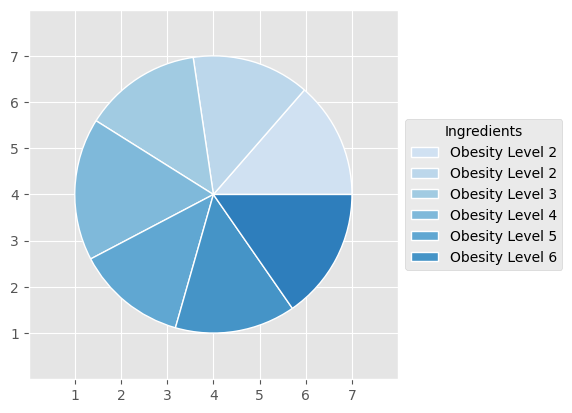

In [105]:
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(percentage)))

# plot
fig, ax = plt.subplots()
ax.pie(percentage, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=True)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

ax.legend(ob_level,
          title="Ingredients",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()